### RAG

In [1]:
import sys
sys.path.append('f:/Python/AgenticEuro2025/src/')
from agentic_rag import AgenticRAG
from langchain_core.messages import HumanMessage
from vector_stores.store_factory import StoreFactory
from embeddings.embedding_factory import EmbeddingFactory
from dotenv import load_dotenv
load_dotenv('../.env')

embedding_model = EmbeddingFactory("ollama").create_embedding()
store_factory = StoreFactory(store_type="faiss", embedding_model=embedding_model)
vector_store = store_factory.get_store()
vector_store.load_vector_store(database_name=r"f:\Python\AgenticEuro2025\src\rag\Euro2025Metadata")
agentic_rag = AgenticRAG(vector_store)

In [2]:
state = {"messages": [HumanMessage("how can i buy tickets?")], "question_language": "Spanish"}
print(agentic_rag(state)["messages"][-1].content)

Puedes comprar boletos para la Eurocopa Femenina 2025 en womenseuro.com y ticketcorner.ch. Se lanzarán más boletos adicionales el 17 de diciembre a las 11:00 CET. Si no puedes comprar boletos en diciembre, se lanzarán más en febrero de 2025.


In [8]:
query = {"messages": [HumanMessage("what can you say about portugal?")], "question_language": "Spanish"}
print(agentic_rag(query)["messages"][-1].content)

Portugal está jugando en su tercera EURO consecutiva después de también aparecer en la Copa del Mundo de 2023. Su entrenador es Francesco Neto.


In [3]:
query = {"messages": [HumanMessage("what can you say about argentina?")], "question_language": "English"}
print(agentic_rag(query)["messages"][-1].content)

"I don't have information about Argentina, but I can assist you with questions about the Women's Football Eurocup 2025."


In [4]:
query = {"messages": [HumanMessage("Is there a VAR?")], "question_language": "Spanish"}
print(agentic_rag(query)["messages"][-1].content)

Sí, habrá VAR en la UEFA Women's Euro 2025.


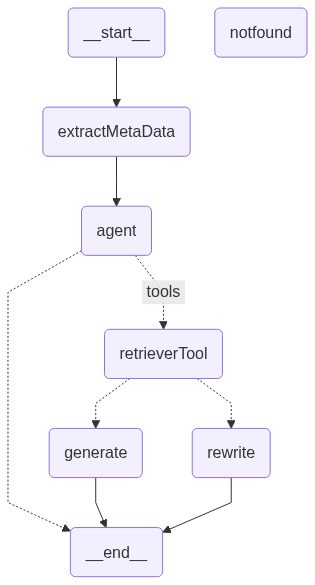

In [6]:
from IPython.display import Image, display
display(Image(agentic_rag.graph.get_graph().draw_mermaid_png()))